In [1]:
# ANN OCR trained with Noise
# numpy/tensorflow/keras
#
# ICIN/IC Ex1 - Ago/2018 - Adolfo Bauchspiess 

import numpy as np

from keras.models import Sequential
from keras.models import clone_model
from keras.layers import Dense
from keras.utils.vis_utils import plot_model

import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import matplotlib.cm as cm
import matplotlib.lines as lines

import tensorflow as tf
 
import geraChar


N=   # Levels of noise
Nnt= # Number of training noise samples for each noise level
Nnv= # Number of validating noise samples
NStep=  # Noise step

P=[]  # Pattern
T=[]  # Target
Pn=[] # Noise Pattern
fitT=np.zeros((N),dtype=int)  # Store the number of incorrect Chars while training
fitV=np.zeros((N),dtype=int)  # Store the number of incorrect Chars while training


Using TensorFlow backend.


In [3]:
# create models with 0, 10, 20 .... 90% noisy bit
(P,T)=geraChar.geraChar()

# Creat a set of N ANNs
Models=[]
for i in range(N): # for each model    
    model = Sequential()
    model.add(Dense(, activation="sigmoid", kernel_initializer="uniform", input_dim=63))
    model.add(Dense(16, activation="sigmoid", kernel_initializer="uniform"))
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    Models.append(model)
    
print("Train networks")   
Models[0].fit(P, T, epochs=, batch_size=1, verbose=0)

Train networks


In [4]:

for i in range(1,N): # for each model
# Learn Nstep epochs Noise Chars + epochs reforcing orig. Chars.
                            
    # Mantain Models[i-1] and proceed training with noise
    Models[i].set_weights(Models[i-1].get_weights())
                            
    # test with different noise levels (at least once - range(i+1))
    for k in range(Nnt):
        Pn = geraChar.gchar_ruido(P,NStep*i)
        Models[i].fit(Pn, T, epochs=, batch_size=1, verbose=0)
        (incorr,idx) = geraChar.validacao(Pn,Models[i])
        fitT[i] += incorr
         
    #Pn = geraChar.gchar_ruido(P,0) # Reforce learning without noise 
    Models[i].fit(P, T, epochs=, batch_size=1, verbose=0)
    (incorr,idx) = geraChar.validacao(P,Models[i])
    fitT[i] += incorr

    print("Rede i",i,"incorr",str(np.round(fitT[i],2)))
 

('Rede i', 1, 'incorr', '0')
('Rede i', 2, 'incorr', '0')
('Rede i', 3, 'incorr', '0')
('Rede i', 4, 'incorr', '0')
('Rede i', 5, 'incorr', '0')
('Rede i', 6, 'incorr', '2')
('Rede i', 7, 'incorr', '4')
('Rede i', 8, 'incorr', '5')
('Rede i', 9, 'incorr', '7')


In [5]:
print(model.summary())
plot_model(model, to_file='model.png',show_shapes=True, show_layer_names=True)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_19 (Dense)             (None, 30)                1920      
_________________________________________________________________
dense_20 (Dense)             (None, 16)                496       
Total params: 2,416
Trainable params: 2,416
Non-trainable params: 0
_________________________________________________________________
None


In [7]:
# Validate the trained ANN

fitV=np.zeros((N),dtype=float)
for i in range(N): # for each model
    for k in range(Nnv):
        Pn = geraChar.gchar_ruido(P,NStep*i)
        (incorr,idx) = geraChar.validacao(Pn,Models[i])
        fitV[i] += incorr
FitV=np.round(100*fitV/(16*Nnv),2)
print("Test ANN trained with 0%, 10%,...  noise. % incorrect Chars = ",FitV)

fitO=np.zeros((N),dtype=float)
for i in range(N): # for each model
    for k in range(Nnv):
        Pn = geraChar.gchar_ruido(P,NStep*i)
        (incorr,idx) = geraChar.validacao(Pn,Models[0])
        fitO[i] += incorr
FitO=np.round(100*fitO/(16*Nnv),2)
print("Test original (no noisy train) % incorrect Chars = ",FitO)



('Test ANN trained with 0%, 10%,...  noise. % incorrect Chars = ', array([  0.  ,   0.  ,   0.22,   0.  ,   2.8 ,  19.3 ,  18.75,  17.1 ,
        26.34,  26.16]))
('Test original (no noisy train) % incorrect Chars = ', array([  0.  ,   2.35,   0.  ,   2.75,   4.58,  16.55,  13.6 ,  31.1 ,
        35.75,  34.72]))


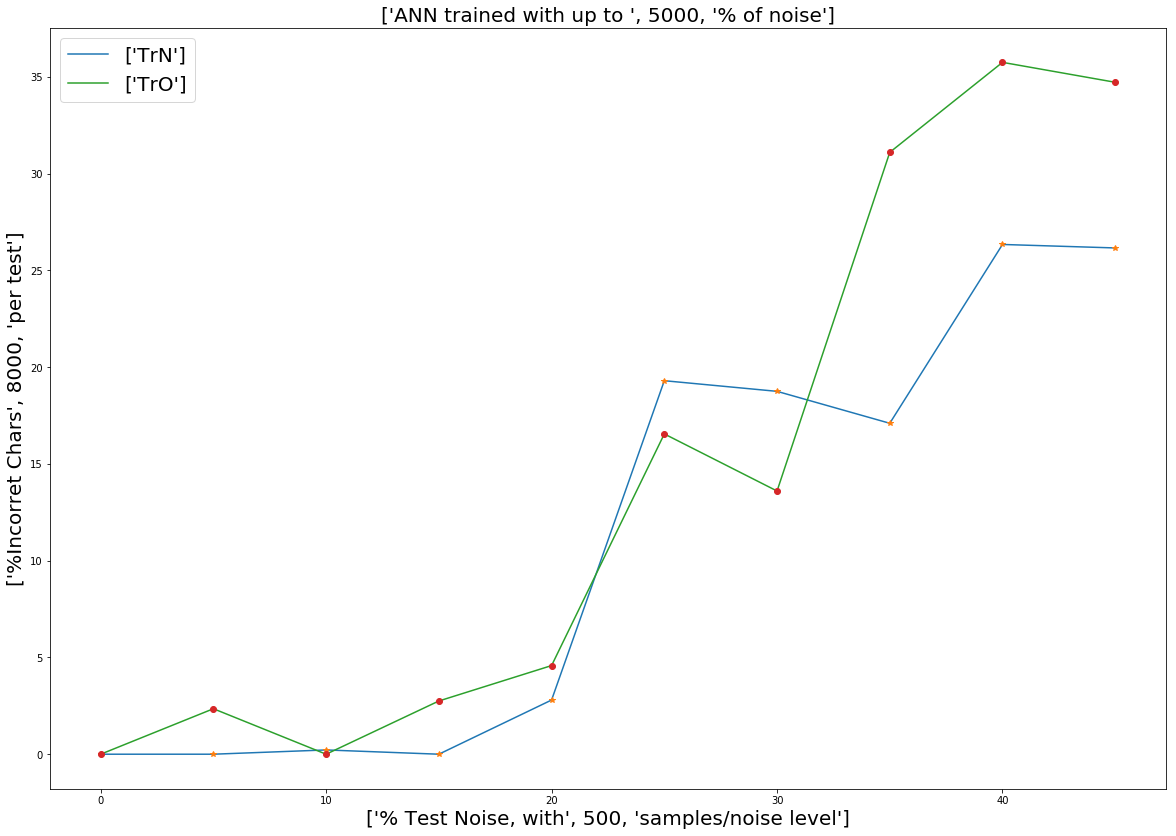

In [8]:
plt.figure(figsize=(20,14))
 
plt.plot(range(0,NStep*N,NStep),FitV, label=['TrN'])
plt.plot(range(0,NStep*N,NStep),FitV,'*')

plt.plot(range(0,NStep*N,NStep),FitO, label=['TrO'])
plt.plot(range(0,NStep*N,NStep),FitO,'o')

plt.title(['ANN trained with up to ' ,N*Nnv,'% of noise'], fontsize=20)
plt.ylabel(["%Incorret Chars",Nnv*16,'per test'], fontsize=20)
plt.xlabel(['% Test Noise, with',Nnv,'samples/noise level'], fontsize=20)
plt.legend(loc='upper left', fontsize=20)
 
plt.savefig('figANN.pdf')
plt.show()     